<a href="https://colab.research.google.com/github/sSaadhussain02/Codercave/blob/main/Breast_Cancer_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Breast Cancer Prediction**

In [1]:
import numpy as np # linear algebra
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
data = pd.read_csv('/content/data.csv')

In [3]:
data.head()

,id,diagnosis,Radius_mean,Texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,21.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
data.shape

(569, 32)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   Radius_mean              569 non-null    float64
 3   Texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

### null values check

In [6]:
data.isnull().sum()

id                         0
diagnosis                  0
Radius_mean                0
Texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

drop **id**

In [7]:
data.drop(['id'],axis=1,inplace=True)

In [8]:
data = data.drop_duplicates()

In [9]:
data.shape

(569, 31)

value count

In [10]:
data['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

*   **M **= malignant


*   **B **= benign


*  **'B'** benign breast conditions are not life-threatening But some are linked with a higher risk of getting breast cancer later on.


*  **'M'** malignant tumor that grows in or around the breast tissue, mainly in the milk ducts and glands.this cancer has spread to other parts of the body, called metastasis.

<Axes: xlabel='diagnosis', ylabel='count'>

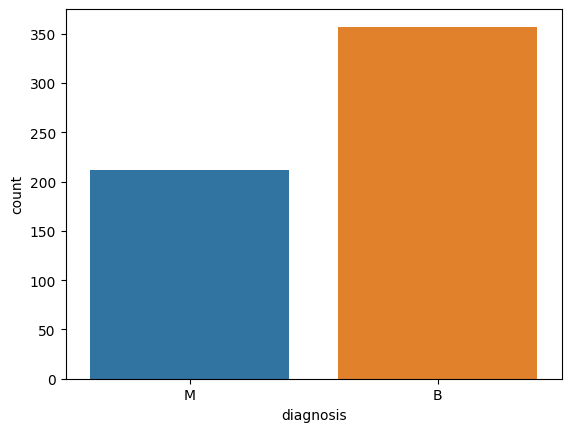

In [11]:
data['diagnosis'].unique()

sns.countplot(x=data['diagnosis'])

In [12]:
data.corr()

<ipython-input-12-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Radius_mean,Texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
Radius_mean,1.000000,0.326716,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
Texture_mean,0.326716,1.000000,0.332231,0.324149,-0.024737,0.235863,0.302324,0.294307,0.071390,-0.077844,...,0.355463,0.911275,0.360485,0.346576,0.076875,0.277075,0.300731,0.297040,0.104590,0.119644
perimeter_mean,0.997855,0.332231,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.987357,0.324149,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.170581,-0.024737,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.506124,0.235863,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.676764,0.302324,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.822529,0.294307,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.147741,0.071390,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
fractal_dimension_mean,-0.311631,-0.077844,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


# **Data Visualization**

<ipython-input-13-8b96879b4d02>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr())


<Axes: >

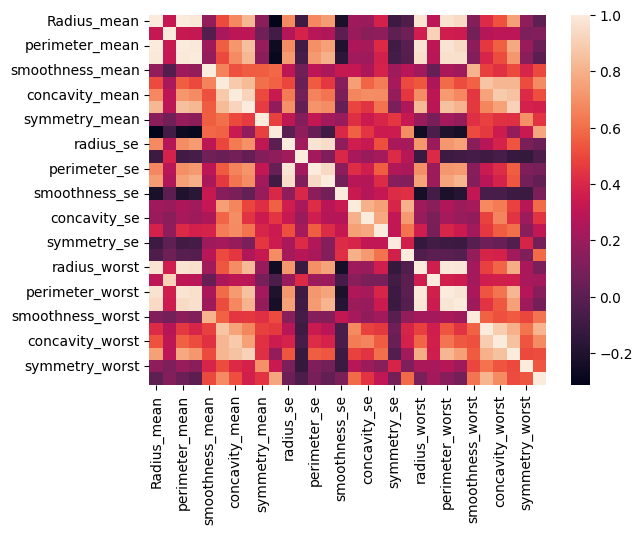

In [13]:
sns.heatmap(data.corr())

### M & B comparison

In [14]:
numeric_columns = [column for column in data.columns if data[column].dtype == 'float64']
print(numeric_columns)

['Radius_mean', 'Texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


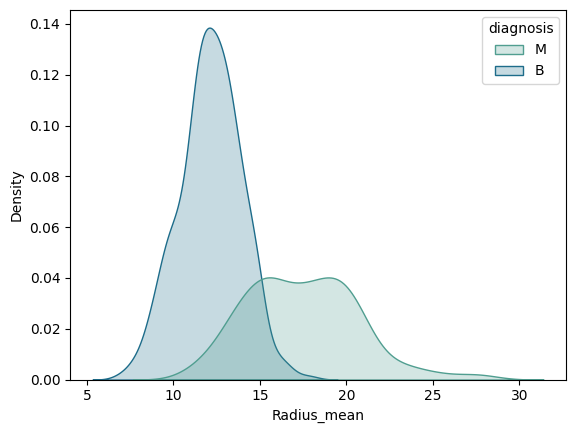

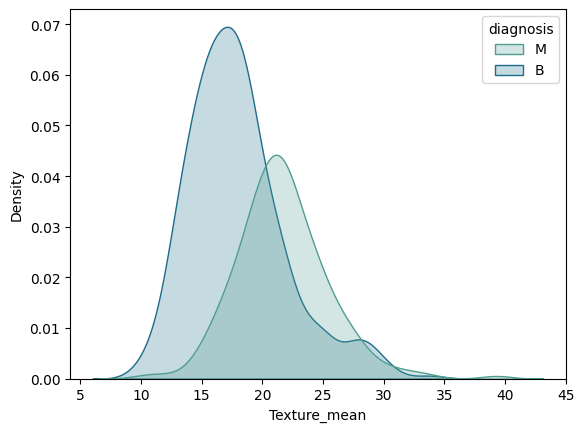

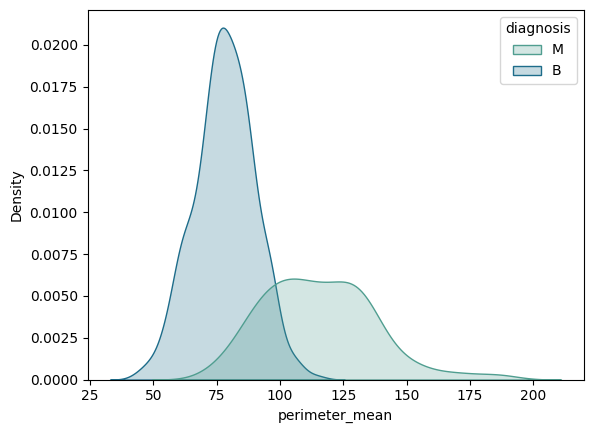

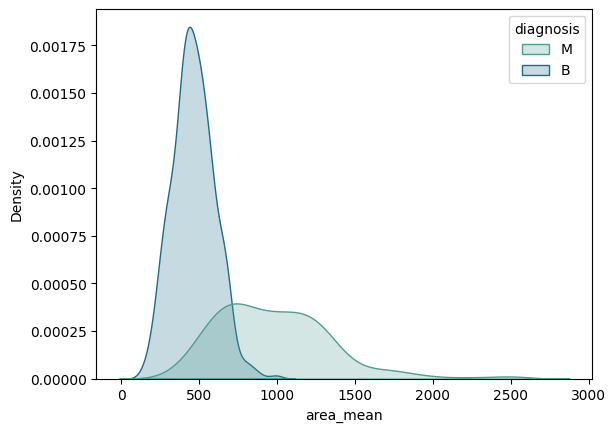

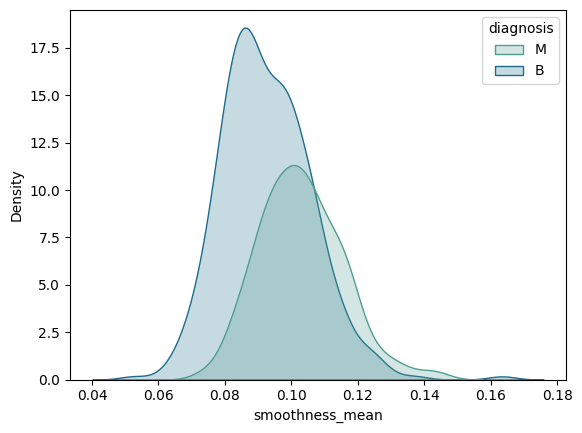

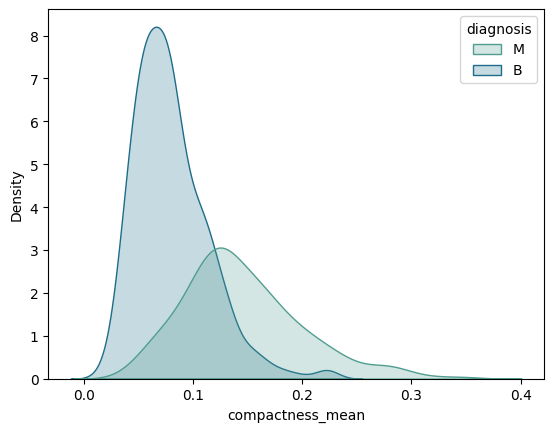

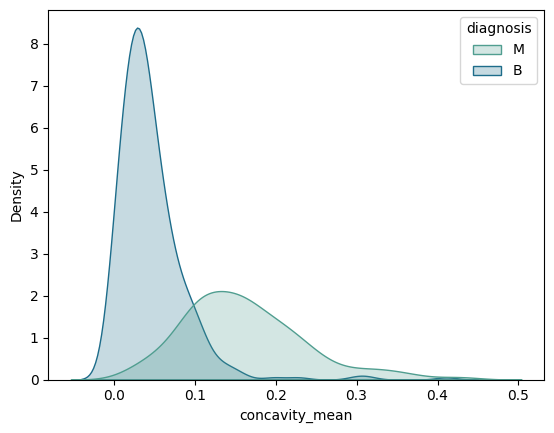

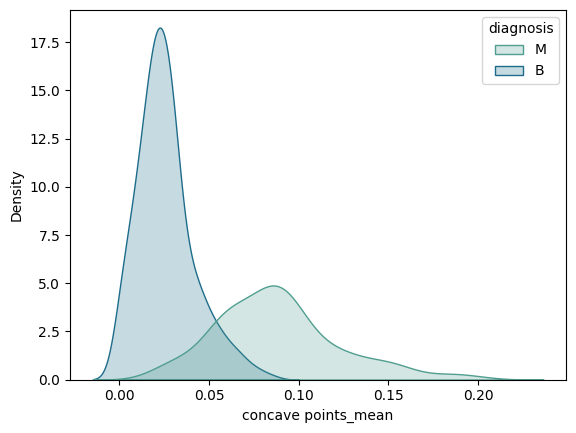

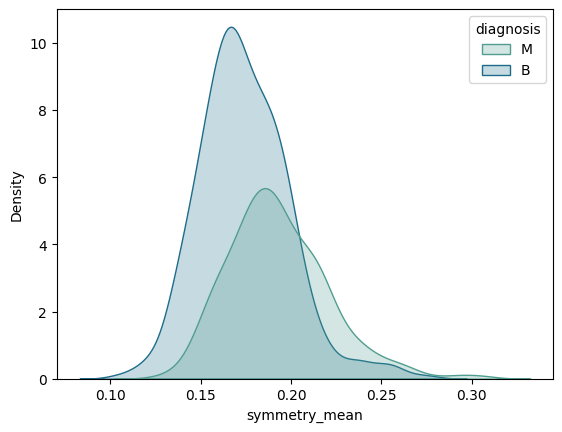

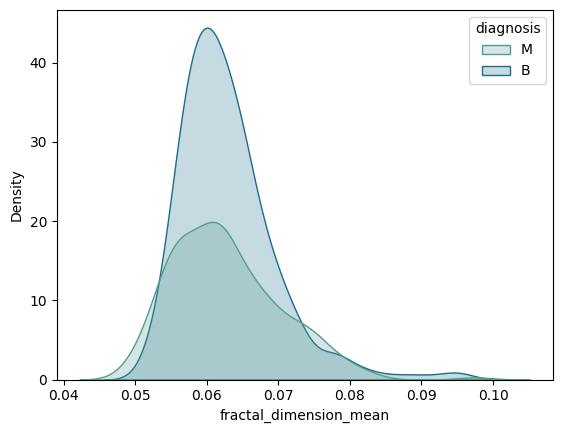

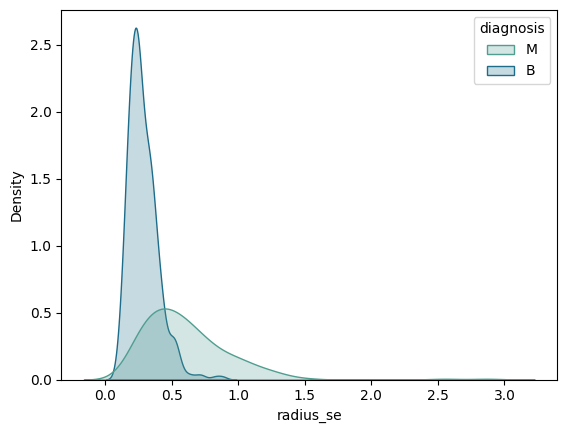

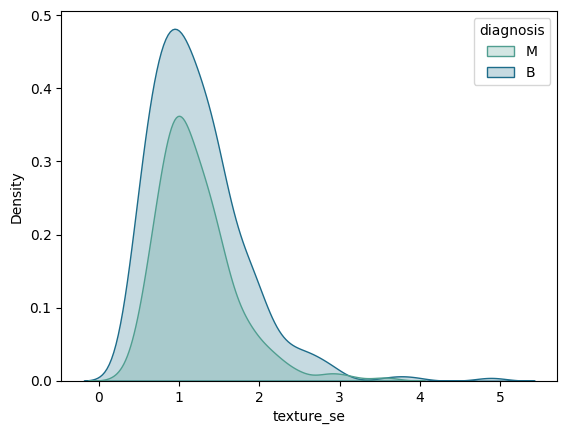

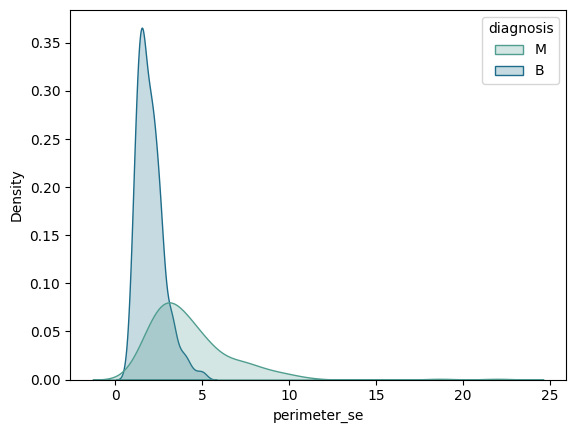

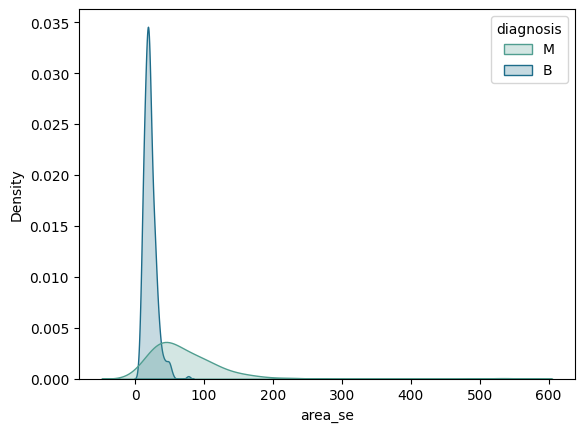

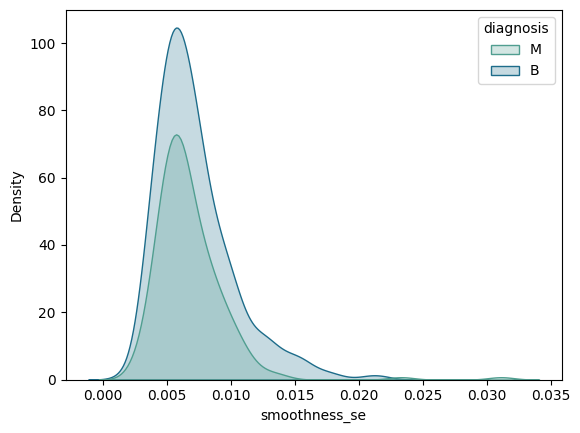

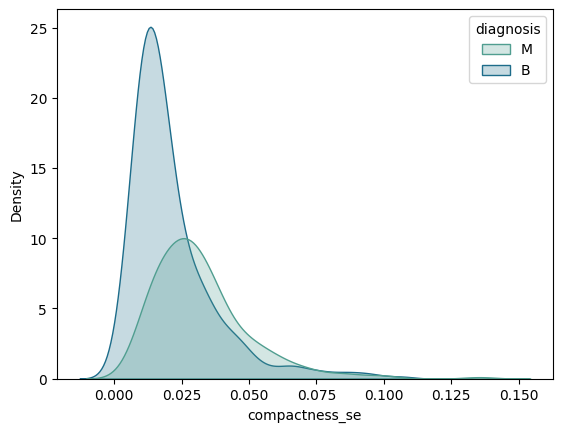

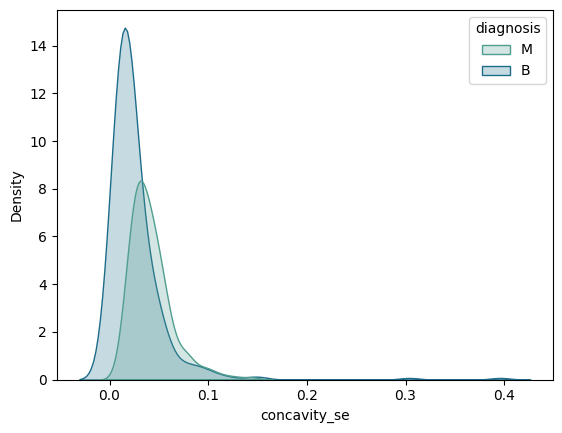

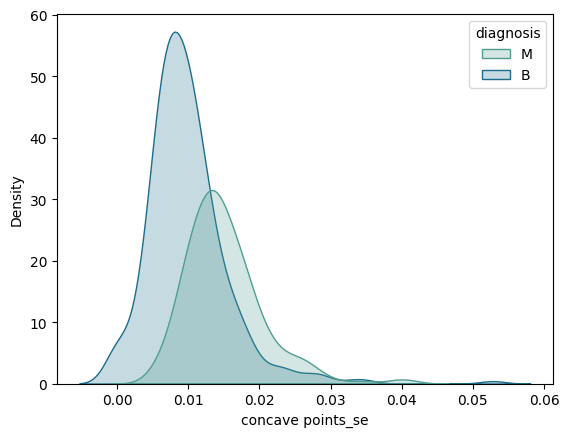

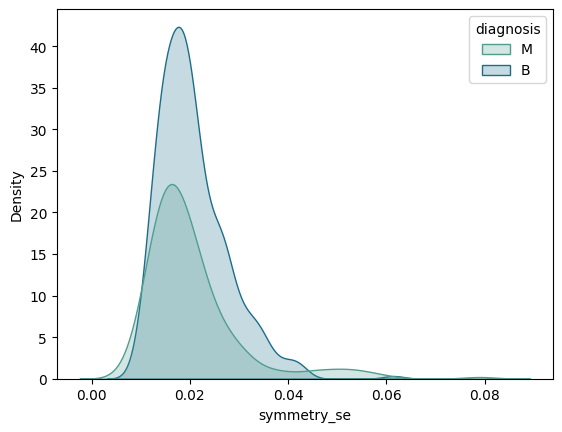

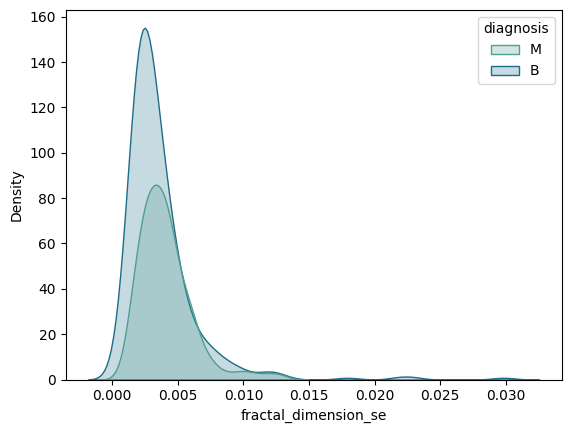

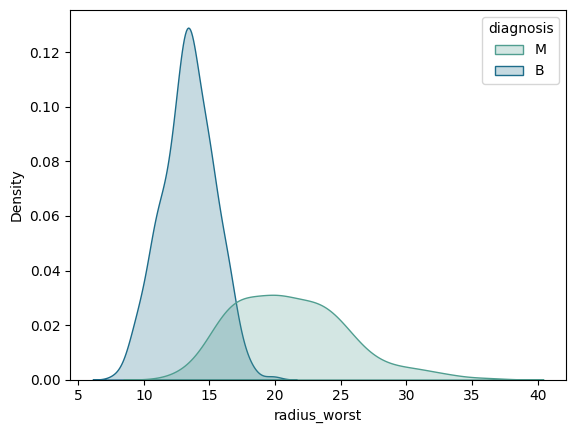

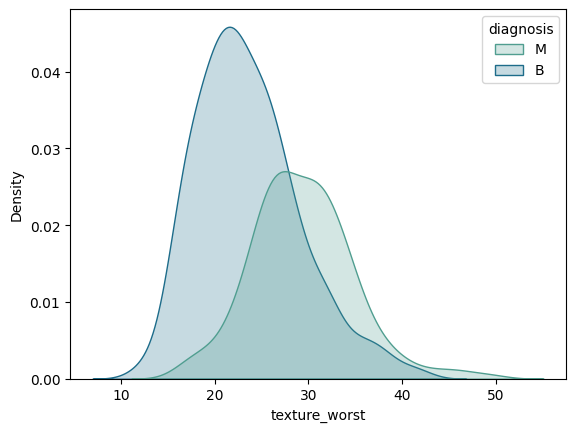

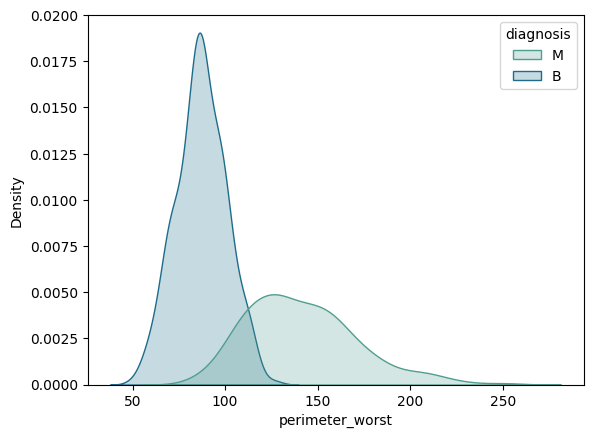

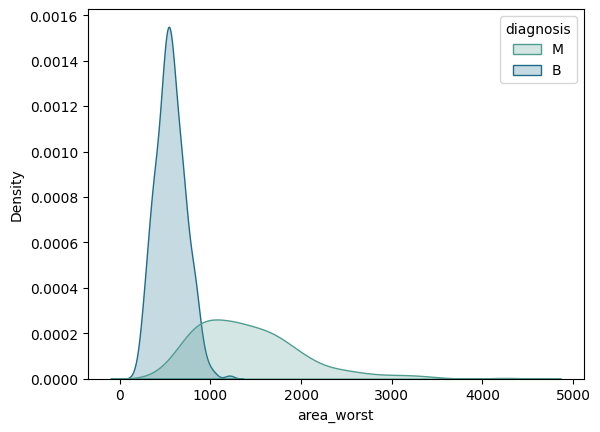

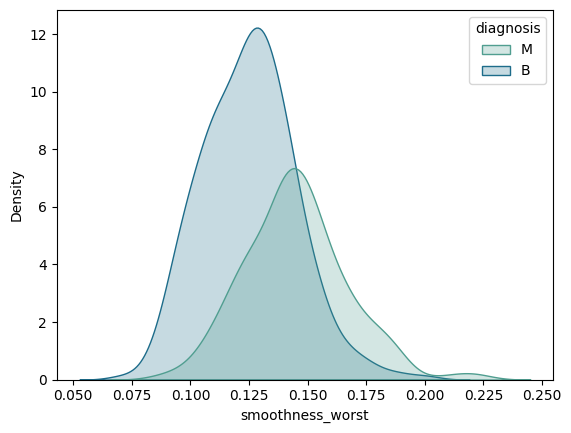

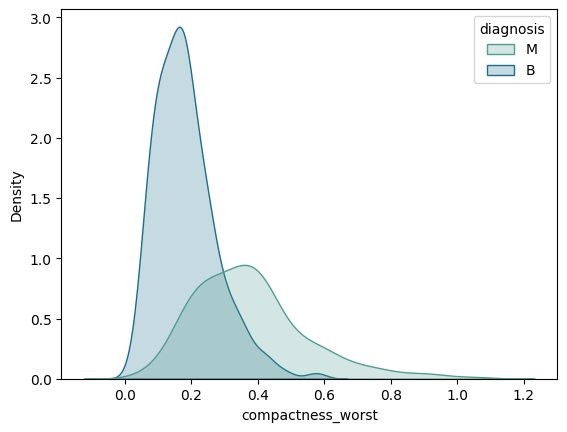

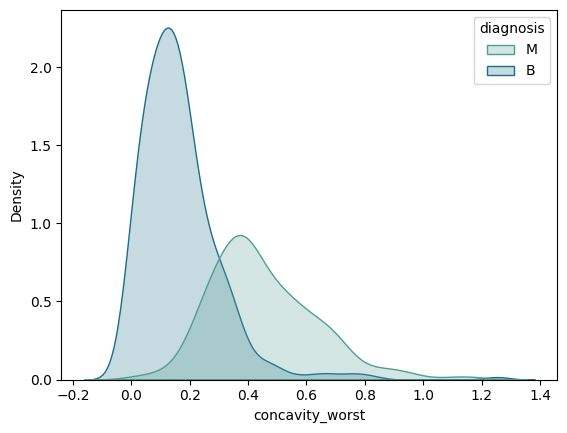

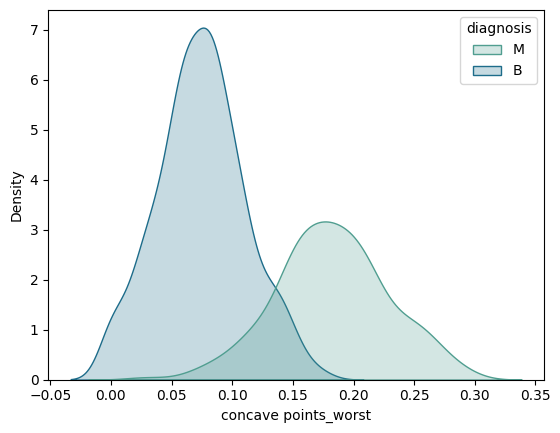

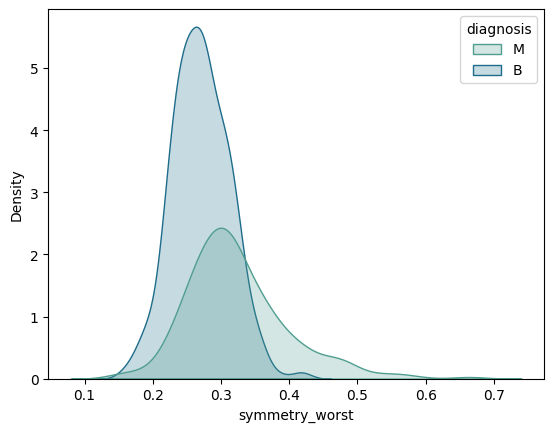

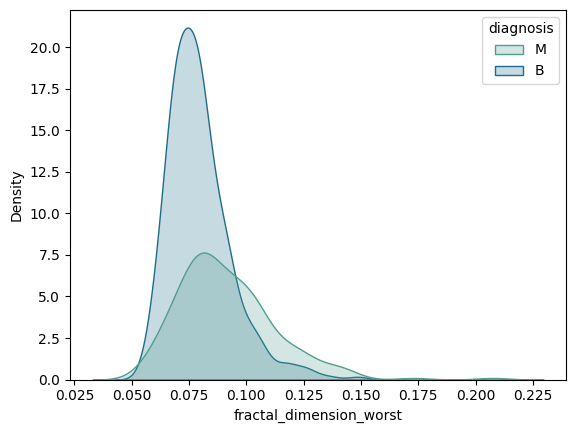

In [15]:
for column in numeric_columns:

    sns.kdeplot(data=data, x=column, hue='diagnosis', palette="crest", fill=True)
    plt.show()

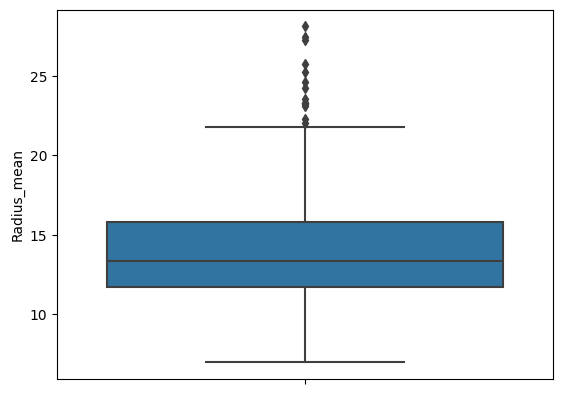

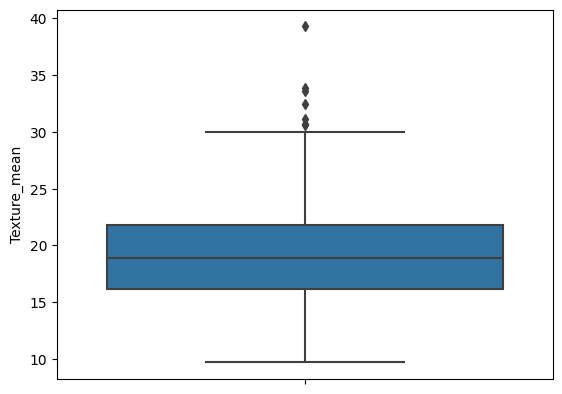

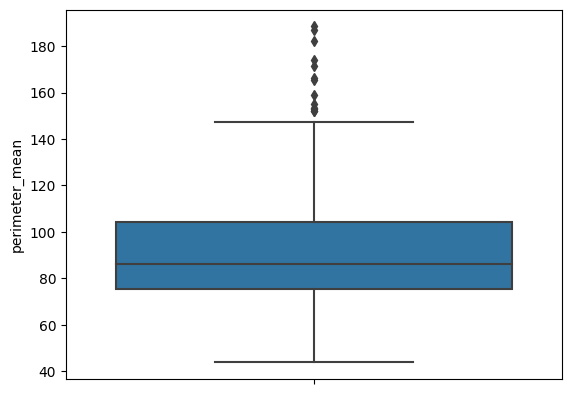

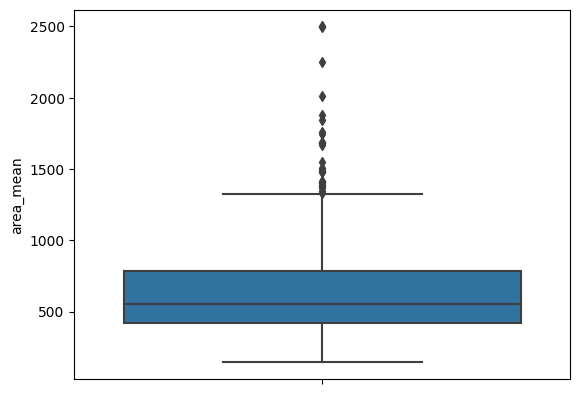

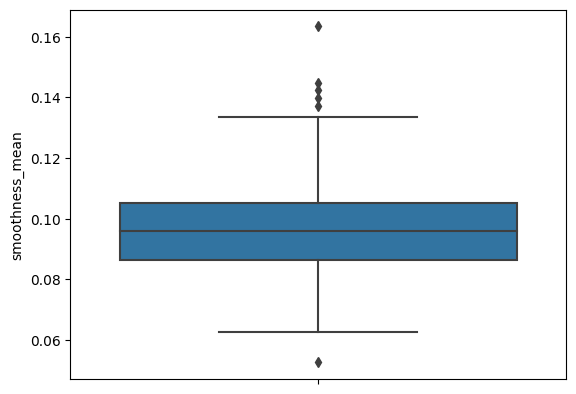

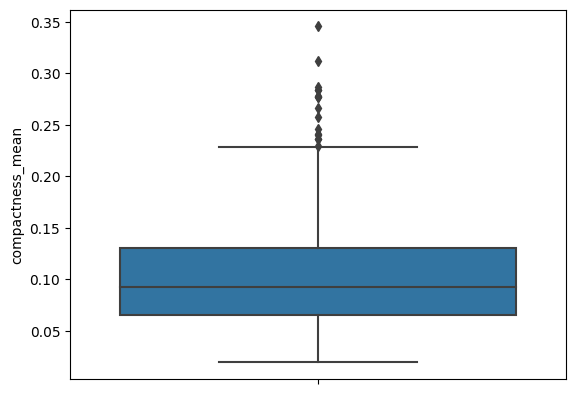

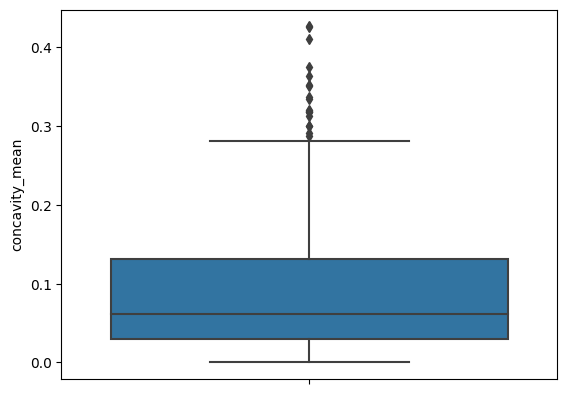

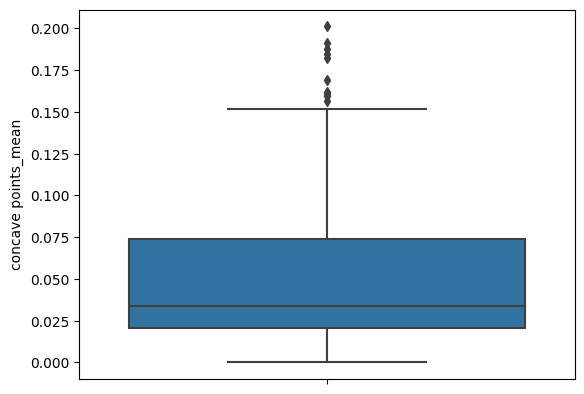

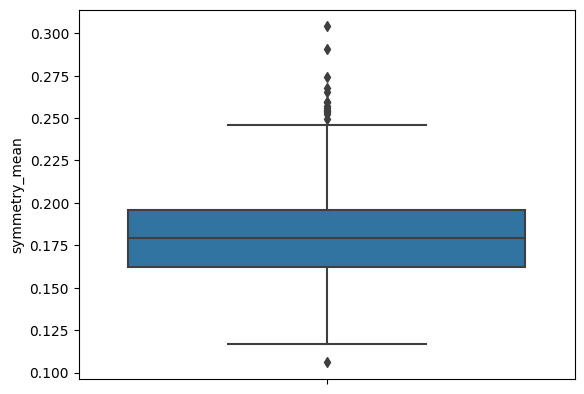

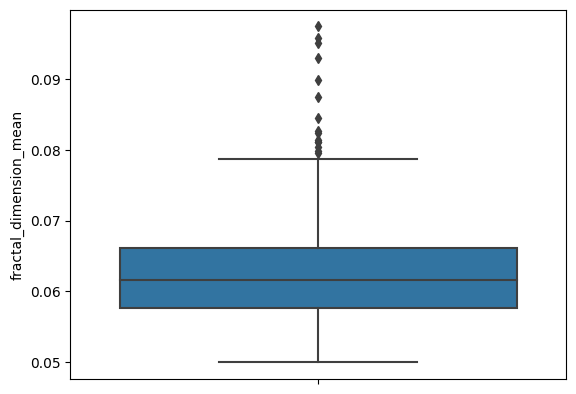

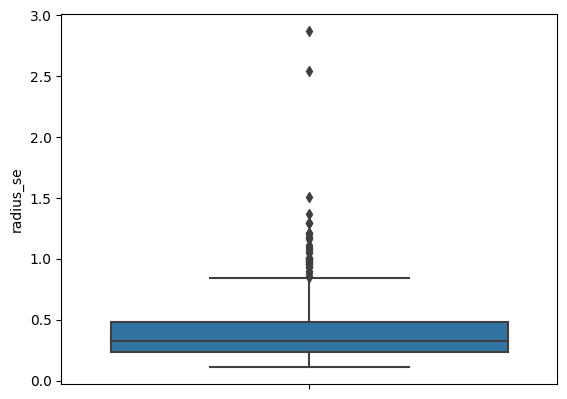

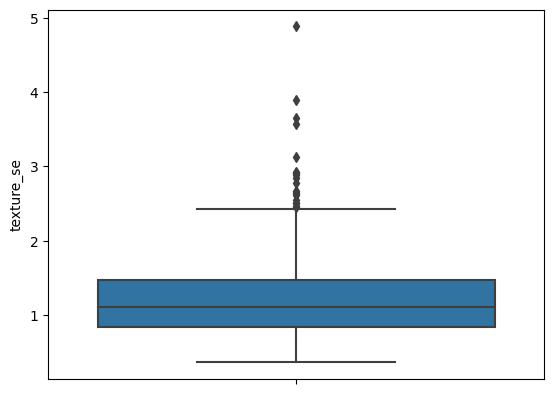

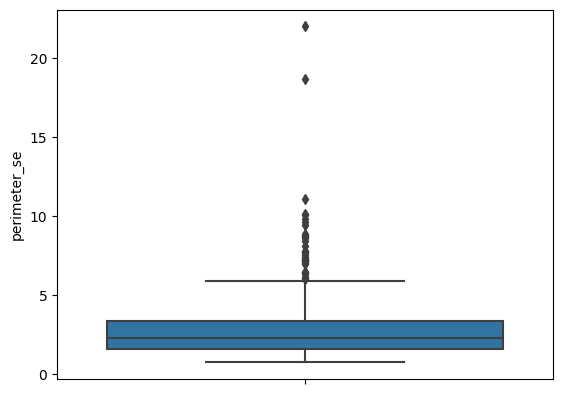

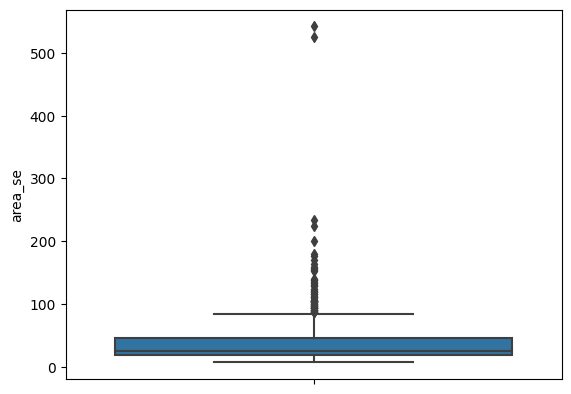

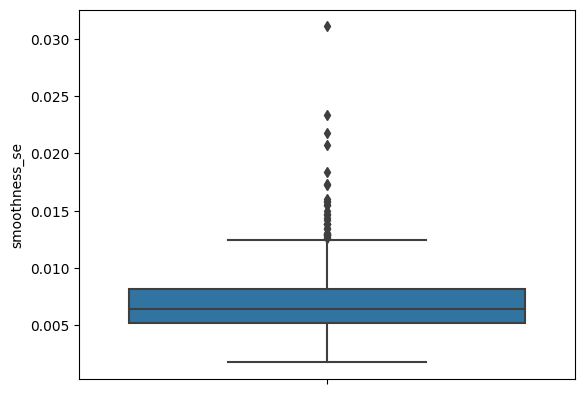

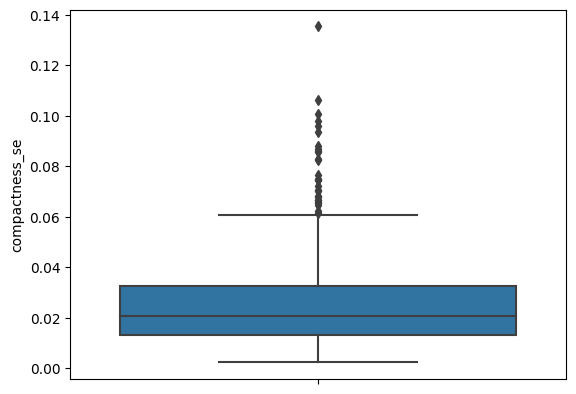

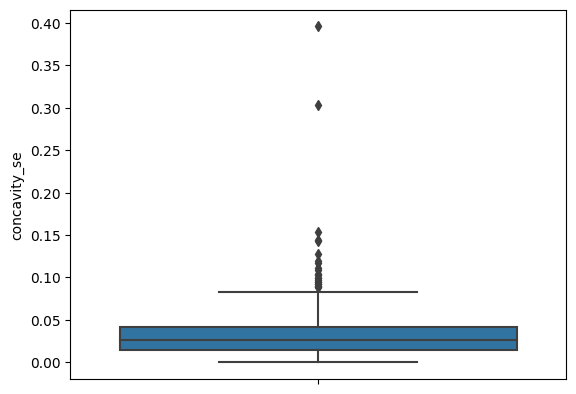

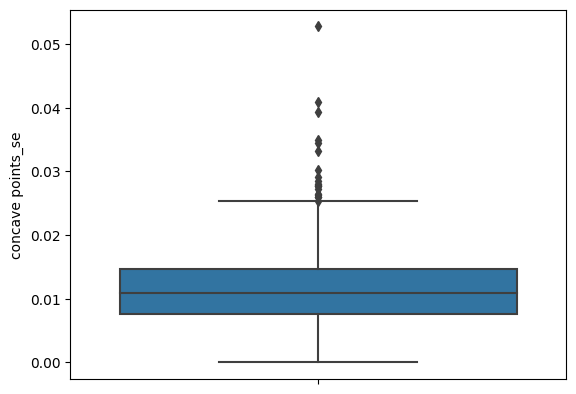

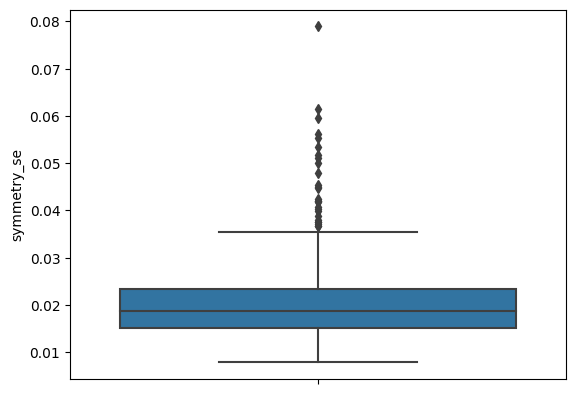

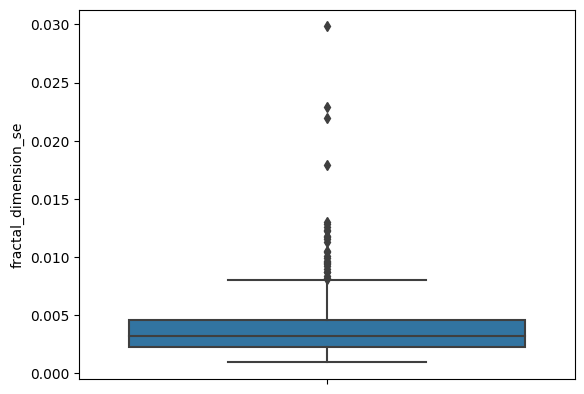

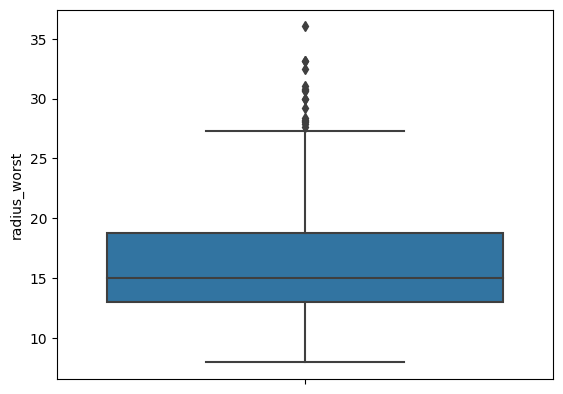

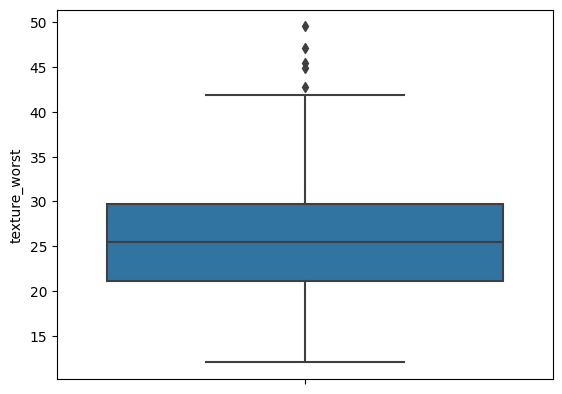

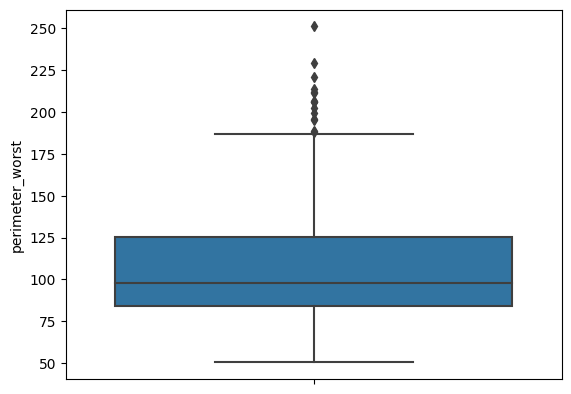

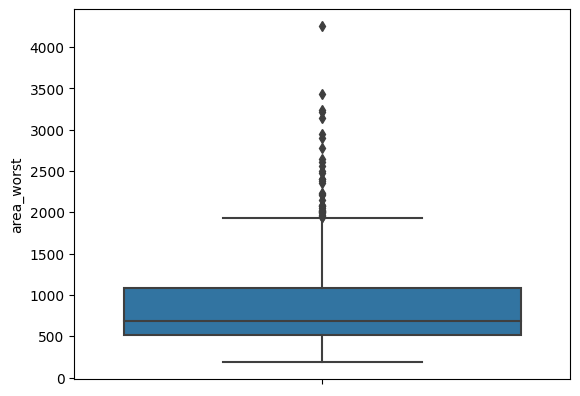

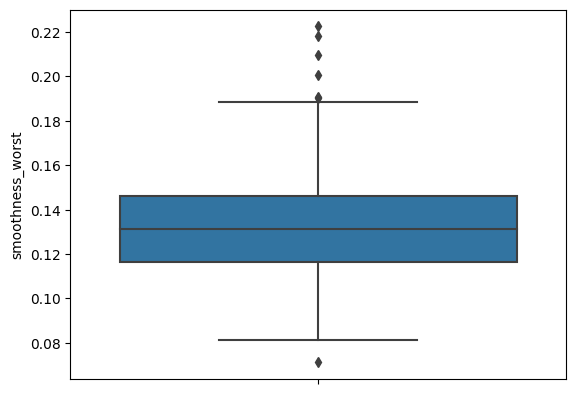

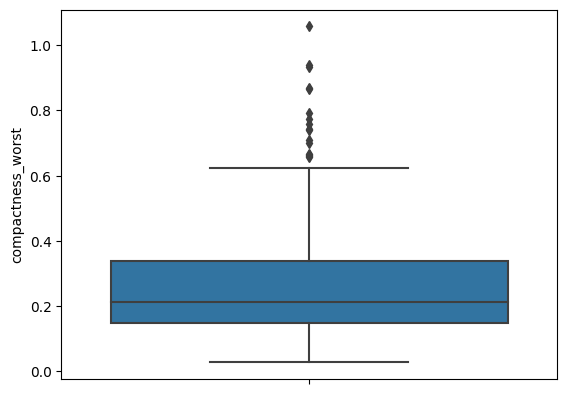

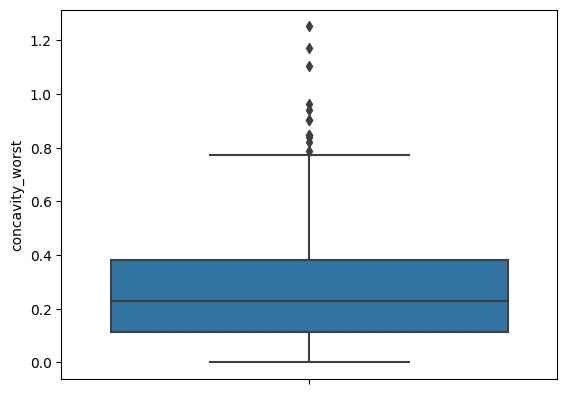

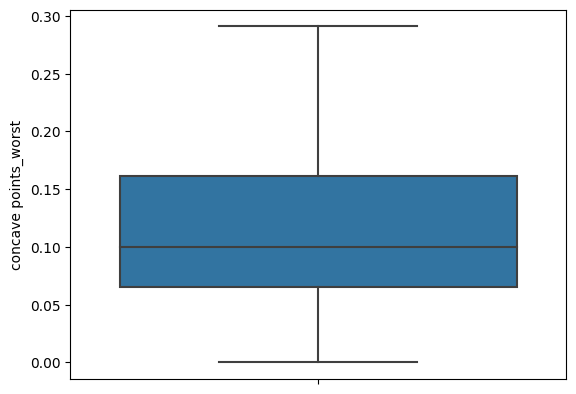

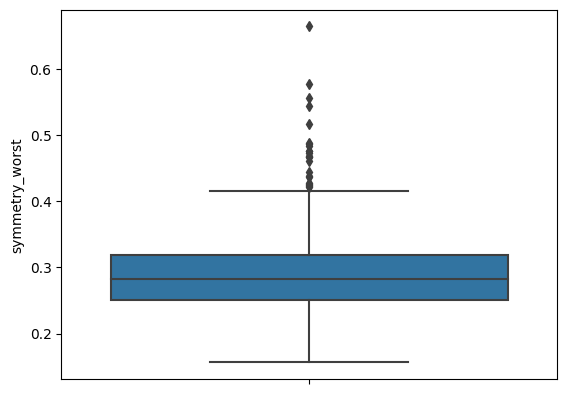

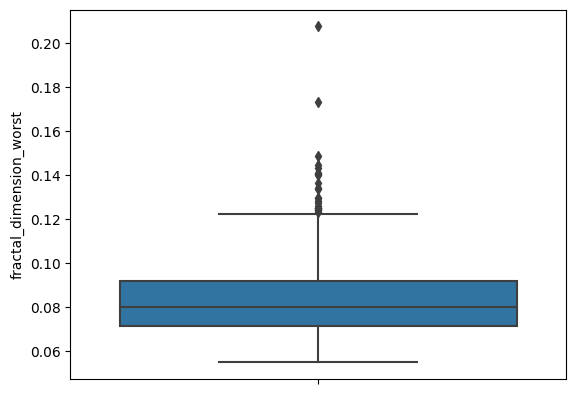

In [16]:
for column in numeric_columns:

    sns.boxplot(data=data,y=column)
    plt.show()

# **Model Training**

In [17]:
X = data.drop(['diagnosis'],axis=1)
y = data['diagnosis']

In [18]:

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1,stratify=y)

In [19]:
x_train.shape

(398, 30)

In [20]:
y_train.shape

(398,)

In [21]:
y_test.value_counts()

B    107
M     64
Name: diagnosis, dtype: int64

In [22]:
y_train.value_counts()

B    250
M    148
Name: diagnosis, dtype: int64

## **Random Forest Classifier**

In [23]:
RFC = RandomForestClassifier(n_estimators=100, random_state=42)
RFC.fit(x_train, y_train)


RandomForestClassifier(random_state=42)

In [24]:
y_pred = RFC.predict(x_test)


In [25]:
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)




In [26]:
print("Confusion Matrix:\n", confusion)
print("\n\n\nClassification Report:\n", report)

Confusion Matrix:
 [[104   3]
 [  9  55]]



Classification Report:
               precision    recall  f1-score   support

           B       0.92      0.97      0.95       107
           M       0.95      0.86      0.90        64

    accuracy                           0.93       171
   macro avg       0.93      0.92      0.92       171
weighted avg       0.93      0.93      0.93       171



In [27]:
print("Accuracy:", accuracy)


Accuracy: 0.9298245614035088


### **Random Forest Classifier Tree**

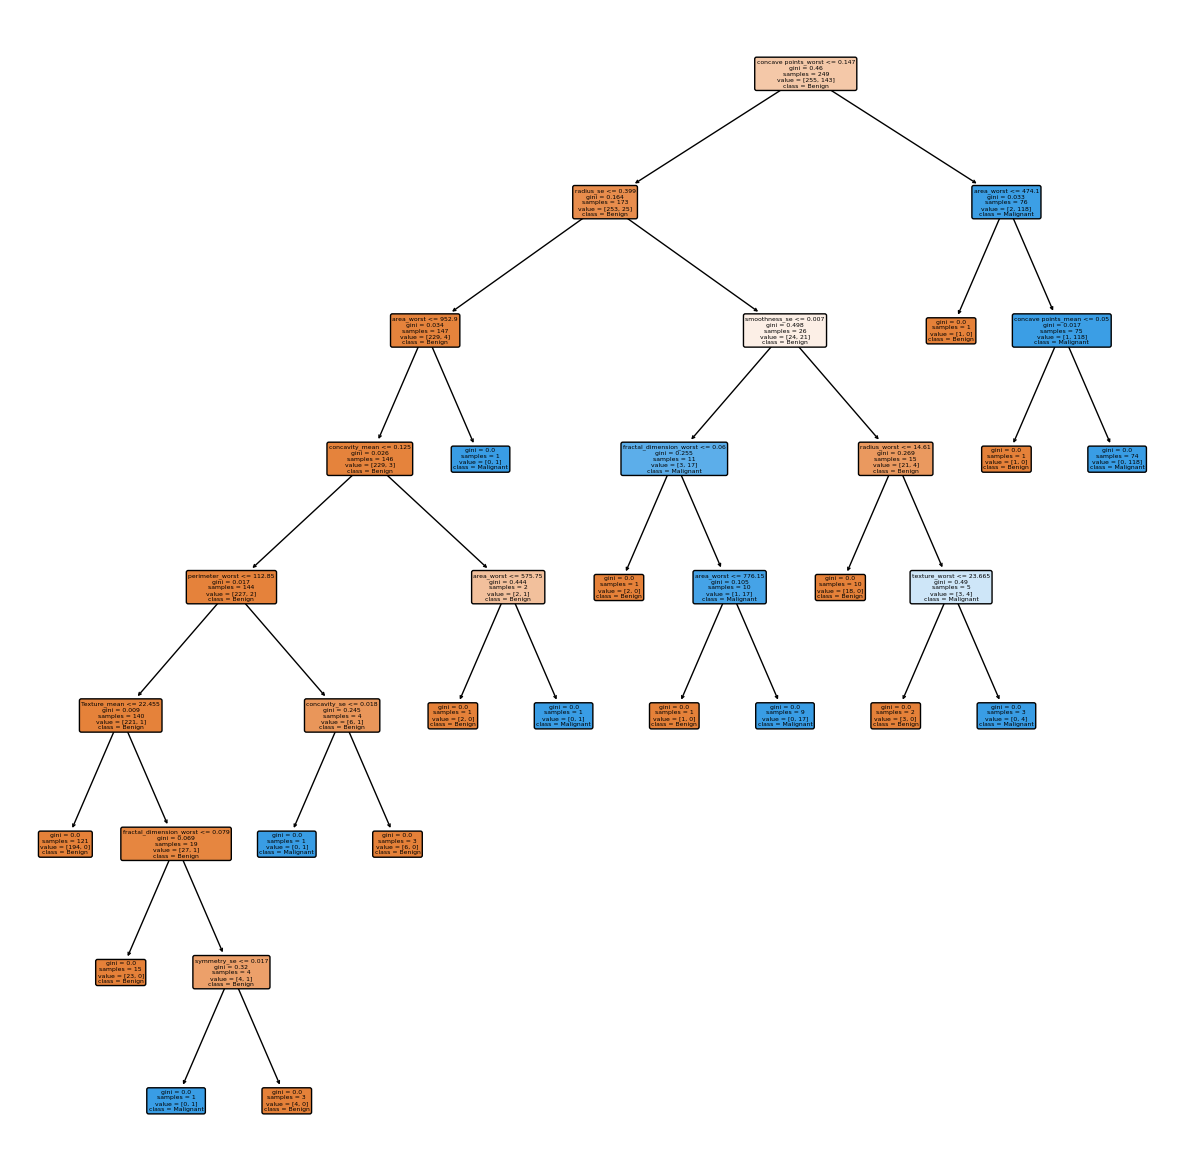

In [28]:
plt.figure(figsize=(15, 15))
plot_tree(RFC.estimators_[0], feature_names=X.columns, class_names=['Benign', 'Malignant'], filled=True, rounded=True)
plt.show()

## **Decision Tree Classifier**

In [29]:
DTC = DecisionTreeClassifier(random_state=42)

In [30]:
DTC.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [31]:
y_pred = DTC.predict(x_test)

In [32]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [33]:
print("Confusion Matrix:\n")
print(conf_matrix)
print("\n\n\n\nClassification Report:\n")
print(classification_rep)

Confusion Matrix:

[[104   3]
 [  8  56]]




Classification Report:

              precision    recall  f1-score   support

           B       0.93      0.97      0.95       107
           M       0.95      0.88      0.91        64

    accuracy                           0.94       171
   macro avg       0.94      0.92      0.93       171
weighted avg       0.94      0.94      0.94       171



In [34]:
print("Accuracy:", accuracy)

Accuracy: 0.935672514619883


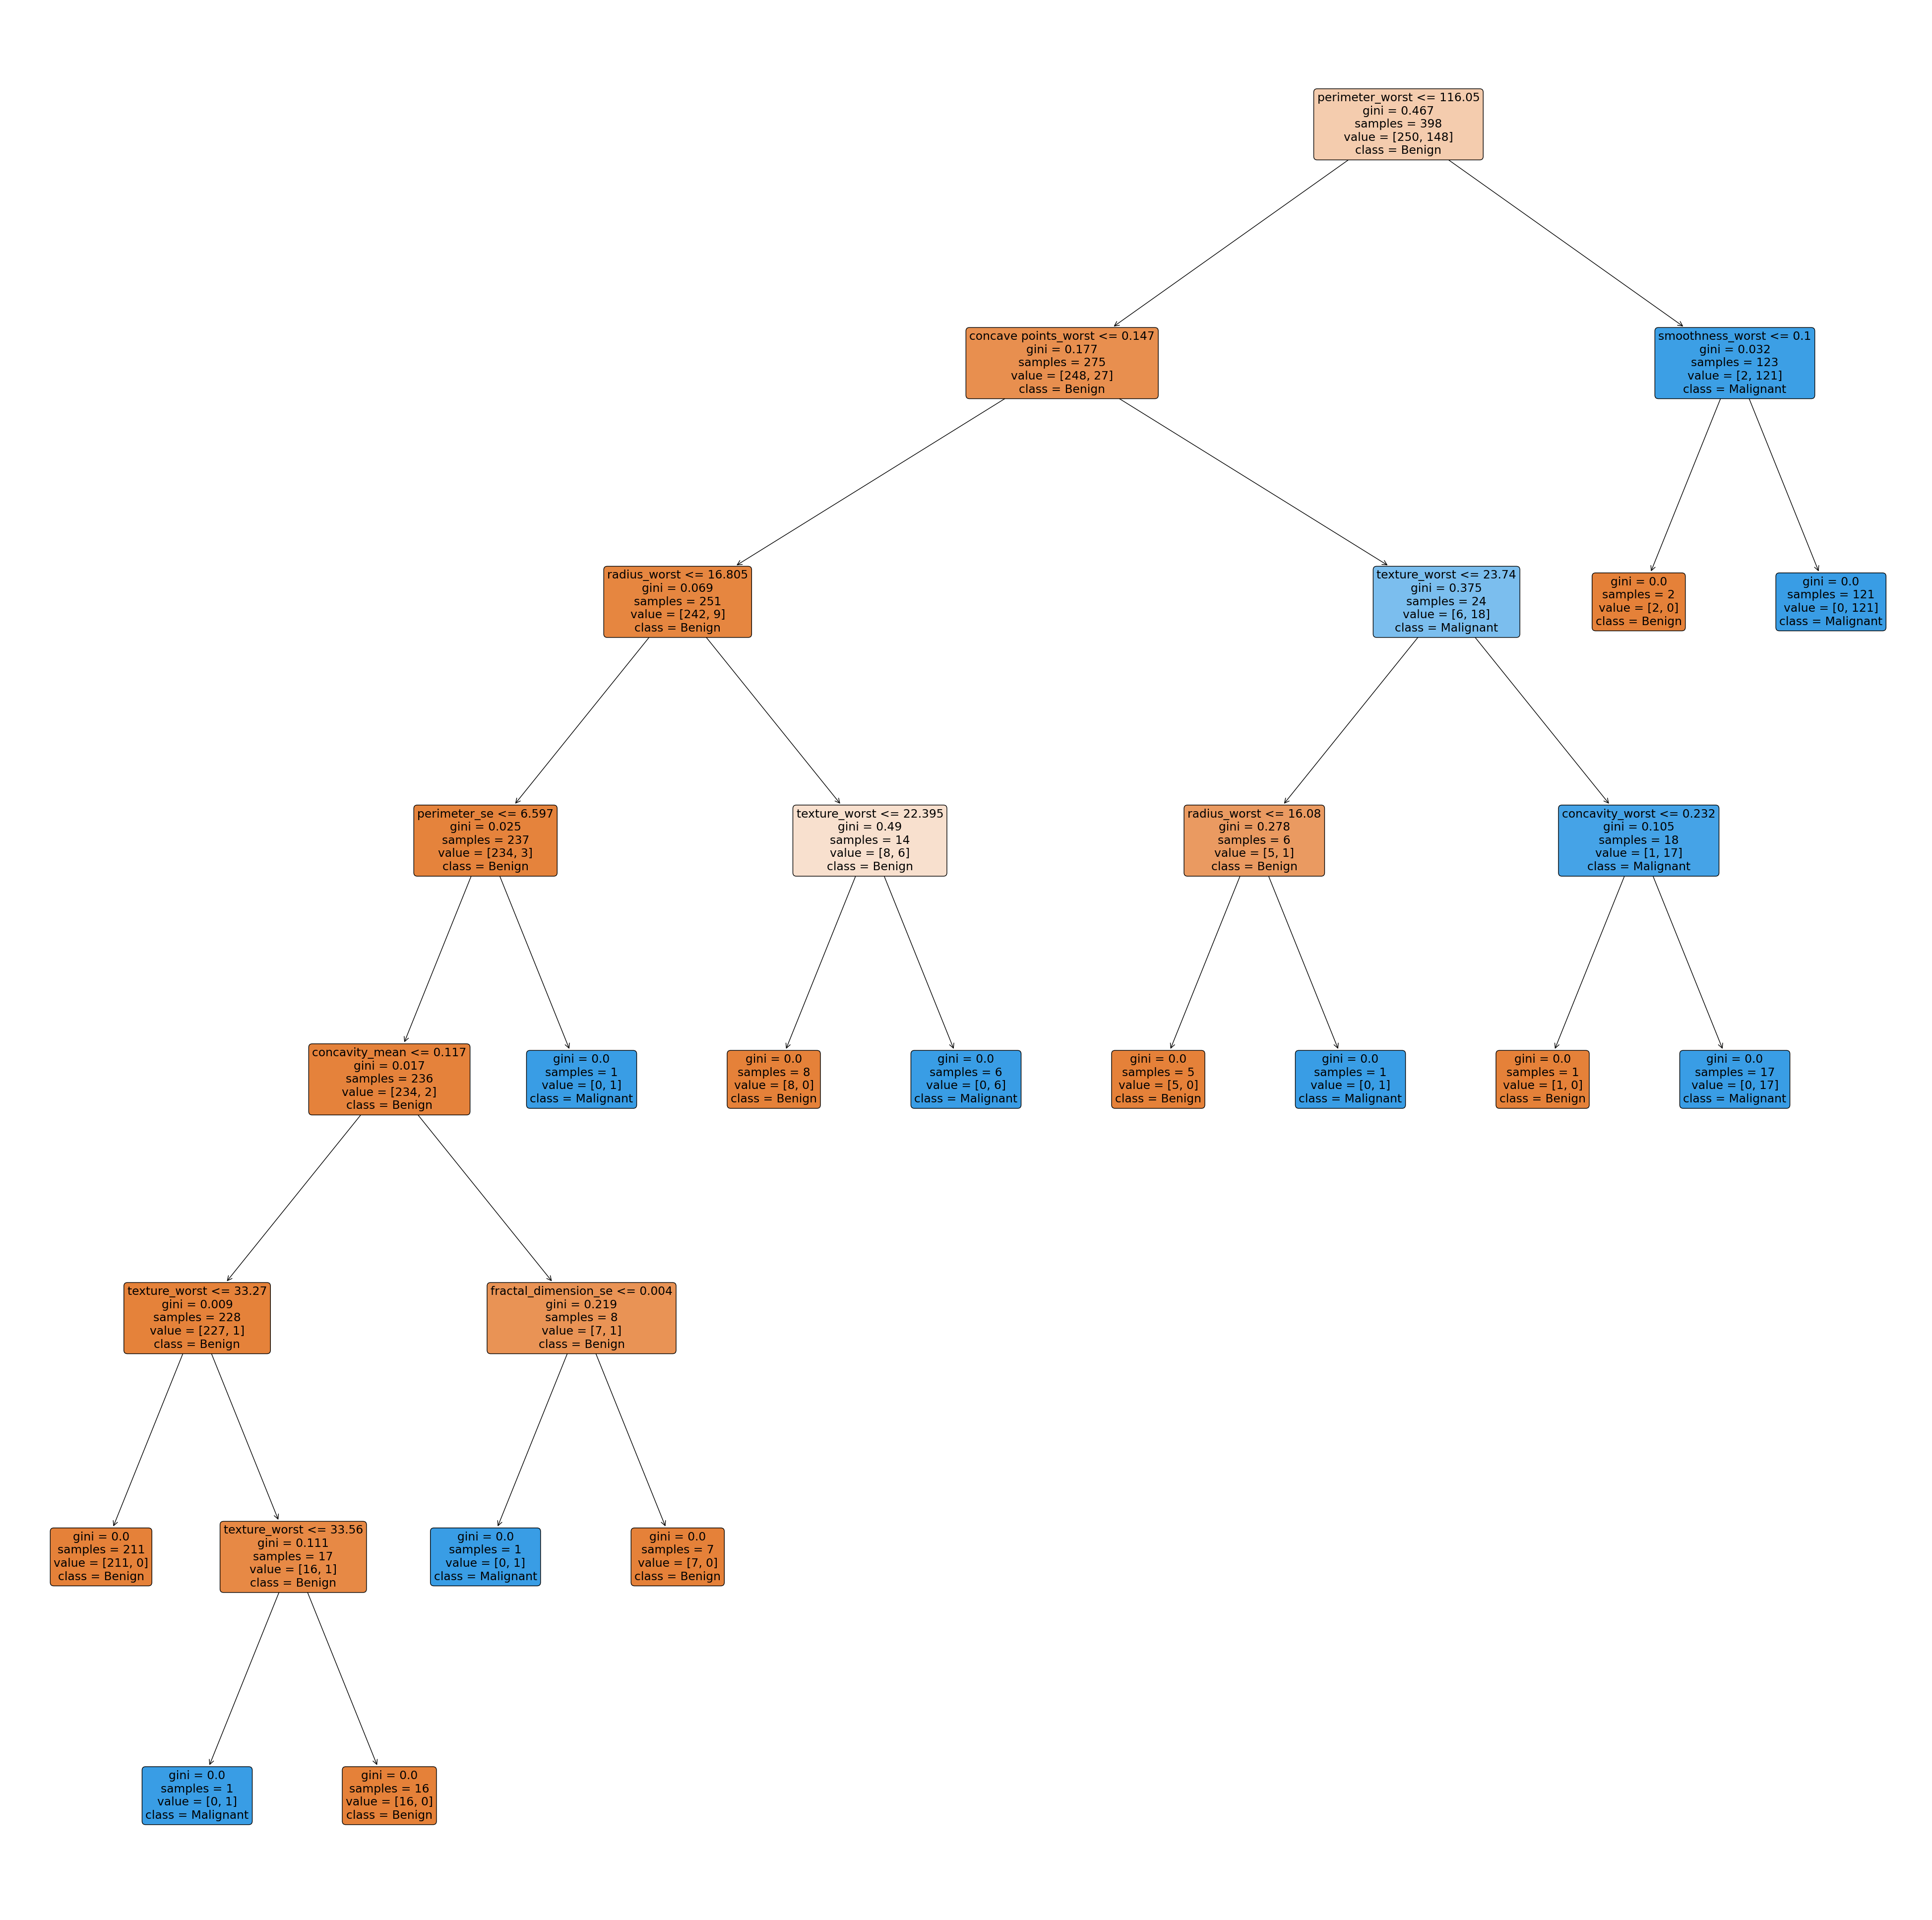

In [47]:
plt.figure(figsize=(50, 50))
plot_tree(DTC, feature_names=X.columns, class_names=['Benign', 'Malignant'], filled=True, rounded=True)
plt.show()

### **Prediction**

In [44]:
new_scenario = np.array([
    [ 15.0, 90.0, 600.0, 0.1, 0.2, 0.3, 0.15, 0.2, 0.08,
    0.2, 1.5, 1.2, 10.0, 100.0, 0.005, 0.02, 0.03, 0.01, 0.02,
    0.003, 16.0, 18.0, 100.0, 800.0, 0.12, 0.3, 0.4, 0.18, 0.25, 0.06]
])

new_scenario_2d = new_scenario.reshape(1, -1)
prediction = DTC.predict(new_scenario_2d)


if prediction == 0:
    result = "Benign"
else:
    result = "Malignant"

print(f"The model Decision Tree predicts that the scenario is {result}.")

The model Decision Tree predicts that the scenario is Malignant.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [45]:
new_scenario = np.array([
    [ 15.0, 90.0, 600.0, 0.1, 0.2, 0.3, 0.15, 0.2, 0.08,
    0.2, 1.5, 1.2, 10.0, 100.0, 0.005, 0.02, 0.03, 0.01, 0.02,
    0.003, 16.0, 18.0, 100.0, 800.0, 0.12, 0.3, 0.4, 0.18, 0.25, 0.06]
])

new_scenario_2d = new_scenario.reshape(1, -1)
prediction = RFC.predict(new_scenario_2d)


if prediction == 0:
    result = "Benign"
else:
    result = "Malignant"

print(f"The Random Forest model predicts that the scenario is {result}.")

The Random Forest model predicts that the scenario is Malignant.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
